In [35]:
%run init_notebook.py

In [41]:
from src.utils import load_pd_df, get_dt_index
from src.processing import pd_join_dfs, pd_groupby

In [37]:
topics = load_pd_df('lda_topics_smooth.feather')
hhp = load_pd_df('hhp_processed.feather')
pi = get_dt_index(load_pd_df('de_inf_prepro.csv')).sort_index()

In [38]:
df = pd_join_dfs(
    [
        pi[['pi_de', 'pi_de_Y', 'pi_de_estimate_Y', 'pi_de_surprise_Y']],
        hhp.set_index('date_recorded')[
            ['date_forecast', 'pi_exp_WY', 'pi_exp_MY', 'pi_perc_MY', 'pi_perc_WY', 'hhinc_delta', 'delta_pe_WY', 'id']
        ],
        topics[[i for i in topics.columns if i.split('_')[-1] == "s"]],
        
    ],
    index_name='date_recorded'
)

In [57]:
sub = pd_groupby(df, ['pi_de_Y', 'pi_de_surprise_Y', 'pi_perc_MY', 'delta_pe_WY', 'inflation_s'], 'M', 'last').drop_duplicates().dropna()

<AxesSubplot: xlabel='M'>

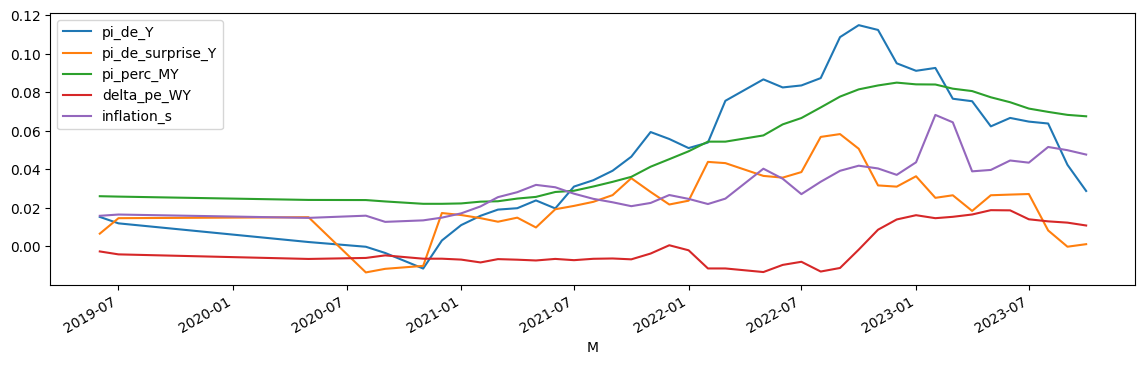

In [58]:
sub.drop_duplicates().plot(figsize=(14,4))